In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
pd.read_csv("E:/PRATHAM/CASE STUDY DATABASE/scrap price.csv")

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
missing_values = ["n/a","NA","N/A","na","==","."]
data = pd.read_csv("E:/PRATHAM/CASE STUDY DATABASE/scrap price.csv",na_values = missing_values)

In [4]:
data.isnull().sum()

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
data.drop(columns=["ID","name"],inplace = True)

In [7]:
def missing_values_treatment(df):
    for col in df.columns:
        print("Treating the ",col)
        if (((df[col].dtypes)=="float64") | ((df[col].dtypes)=="int64")):
            col_mean = df[col].mean()
            df[col] = df[col].fillna(col_mean)
        else:
            col_mode = df[col].mode()
            df[col] = df[col].fillna(col_mode)
    return df
data = missing_values_treatment(data)

Treating the  symboling
Treating the  fueltypes
Treating the  aspiration
Treating the  doornumbers
Treating the  carbody
Treating the  drivewheels
Treating the  enginelocation
Treating the  wheelbase
Treating the  carlength
Treating the  carwidth
Treating the  carheight
Treating the  curbweight
Treating the  enginetype
Treating the  cylindernumber
Treating the  enginesize
Treating the  fuelsystem
Treating the  boreratio
Treating the  stroke
Treating the  compressionratio
Treating the  horsepower
Treating the  peakrpm
Treating the  citympg
Treating the  highwaympg
Treating the  price


In [8]:
# CODE FOR REMOVING OUTLIERS FROM MULTIPLE COLUMNS
# def is used for defining that we are creating function
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=="float64") | ((df[col].dtype)=="int64")):
            percentiles = df[col].quantile([0.01,0.99]).values
            df.loc[df[col] <= percentiles[0],col] = percentiles[0]
            df.loc[df[col] >= percentiles[1],col] = percentiles[1]
        else:
            df[col] = df[col]
    return df
data = cap_data(data)

capping the  symboling
capping the  fueltypes
capping the  aspiration
capping the  doornumbers
capping the  carbody
capping the  drivewheels
capping the  enginelocation
capping the  wheelbase
capping the  carlength
capping the  carwidth
capping the  carheight
capping the  curbweight
capping the  enginetype
capping the  cylindernumber
capping the  enginesize
capping the  fuelsystem
capping the  boreratio
capping the  stroke
capping the  compressionratio
capping the  horsepower
capping the  peakrpm
capping the  citympg
capping the  highwaympg
capping the  price


In [9]:
data = pd.get_dummies(data,columns=["fueltypes","aspiration","doornumbers","carbody","drivewheels","enginelocation","enginetype","cylindernumber","fuelsystem"],drop_first = True)
data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3.0,88.6,168.8,64.1,48.824,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3.0,88.6,168.8,64.1,48.824,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,94.5,171.2,65.5,52.400,2823.0,152.0,2.91,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2.0,99.8,176.6,66.2,54.300,2337.0,109.0,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,99.4,176.6,66.4,54.300,2824.0,136.0,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,109.1,188.8,68.9,55.500,2952.0,141.0,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1.0,109.1,188.8,68.8,55.500,3049.0,141.0,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1.0,109.1,188.8,68.9,55.500,3012.0,173.0,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1.0,109.1,188.8,68.9,55.500,3217.0,145.0,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
Y = data["price"]
X = data.drop("price",axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
# random_state = xx is complesary for avoiding change in random selection of data
x_train.shape

(164, 43)

In [12]:
x_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,0.0,104.9,175.0,66.1,54.4,2700.0,134.0,3.43,3.6400,22.0,...,0,0,0,0,0,1,0,0,0,0
111,0.0,107.9,186.7,68.4,56.7,3075.0,120.0,3.46,2.1968,8.4,...,0,0,0,0,0,0,0,1,0,0
153,0.0,95.7,169.7,63.6,59.1,2280.0,92.0,3.05,3.0300,9.0,...,0,0,0,1,0,0,0,0,0,0
96,1.0,94.5,165.3,63.8,54.5,1971.0,97.0,3.15,3.2900,9.4,...,0,0,0,1,0,0,0,0,0,0
38,0.0,96.5,167.5,65.2,53.3,2289.0,110.0,3.15,3.5800,9.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,99.2,178.5,67.9,49.7,3139.0,181.0,3.43,3.2700,9.0,...,0,0,0,0,0,0,0,1,0,0
14,1.0,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.1900,9.0,...,0,0,0,0,0,0,0,1,0,0
92,1.0,94.5,165.3,63.8,54.5,1938.0,97.0,3.15,3.2900,9.4,...,0,0,0,1,0,0,0,0,0,0
179,3.0,102.9,183.5,67.7,52.0,3016.0,171.0,3.27,3.3500,9.3,...,0,0,0,0,0,0,0,1,0,0


In [13]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(x_train,y_train)

LinearRegression()

In [14]:
model_LR.intercept_

-26751.3549799205

In [15]:
model_LR.coef_

array([ 8.14411456e+01,  9.20863957e+01, -6.99664393e+01,  5.40365102e+02,
        1.18157035e+02,  4.11810799e+00,  1.18302305e+02, -3.18578431e+03,
       -3.99267349e+03, -2.38779860e+02,  7.06345967e+00,  1.83042296e+00,
       -2.37734673e+02,  1.91630038e+02, -2.43432911e+03,  1.63226581e+03,
       -2.41059383e+02, -4.51729907e+03, -2.41636388e+03, -1.53328638e+03,
       -3.20048178e+03, -3.93001364e+01,  1.30347789e+03,  1.13126657e+04,
       -4.24703599e+03, -2.17865990e+03,  2.20827424e+03,  1.07016002e+03,
       -4.05811767e+03,  4.13500662e+02, -6.21776476e+03, -7.06109706e+03,
       -6.56810867e+03,  1.81898940e-12, -8.03644729e+03,  4.13500662e+02,
        1.68169300e+02, -4.05934293e+02,  2.43432911e+03, -2.22587694e+03,
        3.49272670e+02, -2.11710934e+03, -7.47589175e+02])

<AxesSubplot:title={'center':'Model Coefficients'}>

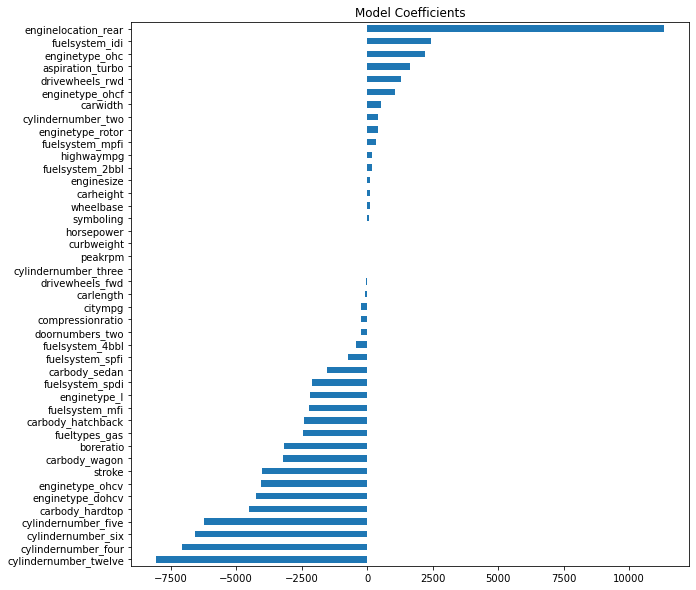

In [16]:
predictors = x_train.columns
coef = pd.Series(np.reshape(model_LR.coef_,43),predictors).sort_values()
coef.plot(kind = "barh",title = "Model Coefficients",figsize = (10,10))

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [18]:
pred_train = model_LR.predict(x_train)
score_train = r2_score(y_train,pred_train)
print("TEST R2 SCORE =",score_train)
mse_train = mean_squared_error(y_train,pred_train)
print("TEST MSE      =",mse_train)

TEST R2 SCORE = 0.9499038856528981
TEST MSE      = 2903231.138103102


In [19]:
pred_test = model_LR.predict(x_test)
score_test = r2_score(y_test,pred_test)
print("TEST R2 SCORE =",score_test)
mse_test = mean_squared_error(y_test,pred_test)
print("TEST MSE      =",mse_test)

TEST R2 SCORE = 0.8967858454635941
TEST MSE      = 8053220.968023933


In [20]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     58.31
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           5.54e-63
Time:                        14:08:47   Log-Likelihood:                -1453.0
No. Observations:                 164   AIC:                             2988.
Df Residuals:                     123   BIC:                             3115.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.783e+

In [21]:
Y = data["price"]
X = data.drop(["price","symboling","wheelbase","carlength","carwidth","curbweight","boreratio","compressionratio","horsepower","citympg","highwaympg","aspiration_turbo","doornumbers_two","carbody_sedan","drivewheels_fwd","drivewheels_rwd","enginetype_dohcv","enginetype_l","enginetype_ohcf","enginetype_rotor","cylindernumber_three","cylindernumber_two","fuelsystem_2bbl","fuelsystem_4bbl","fuelsystem_idi","fuelsystem_mfi","fuelsystem_mpfi","fuelsystem_spdi","fuelsystem_spfi"],axis = 1)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
# random_state = xx is complesary for avoiding change in random selection of data
x_train.shape

(164, 15)

In [23]:
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(x_train,y_train)

LinearRegression()

In [24]:
model_LR.intercept_

-14129.762034281548

In [25]:
model_LR.coef_

array([ 2.86939350e+02,  1.85410595e+02, -4.77091684e+03,  2.90339468e+00,
       -3.25172054e+03, -4.72892441e+03, -8.25692792e+02, -1.38928286e+03,
        8.29698544e+03,  1.60502348e+03, -5.14386530e+03, -5.07654927e+03,
       -9.04609588e+03, -7.30498230e+03, -1.28570873e+04])

<AxesSubplot:title={'center':'Model Coefficients'}>

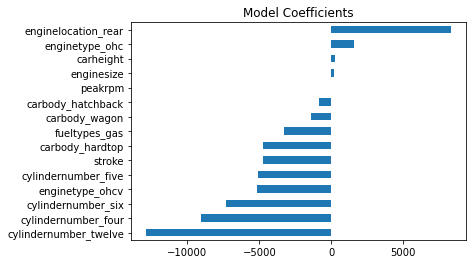

In [26]:
predictors = x_train.columns
coef = pd.Series(np.reshape(model_LR.coef_,15),predictors).sort_values()
coef.plot(kind = "barh",title = "Model Coefficients")

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred_test = model_LR.predict(x_test)
score_test = r2_score(y_test,pred_test)
mse_test = mean_squared_error(y_test,pred_test)
print("TEST R2 SCORE =",score_test)
print("TEST MSE      =",mse_test)

TEST R2 SCORE = 0.871037580250205
TEST MSE      = 10062213.535352156


In [28]:
pred_train = model_LR.predict(x_train)
score_train = r2_score(y_train,pred_train)
mse_train = mean_squared_error(y_train,pred_train)
print("TEST R2 SCORE =",score_train)
print("TEST MSE      =",mse_train)

TEST R2 SCORE = 0.9085092531313113
TEST MSE      = 5302183.385263935


In [29]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     97.98
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           7.79e-69
Time:                        14:08:49   Log-Likelihood:                -1502.4
No. Observations:                 164   AIC:                             3037.
Df Residuals:                     148   BIC:                             3086.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.413e+